In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
batch_size = 32
epoch = 10
kernel = (3, 3)

In [3]:
model = Sequential()
model.add(Conv2D(32, kernel, padding='same', input_shape=(100, 75, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Conv2D(32, kernel, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, kernel, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Conv2D(64, kernel, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Flatten())
model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(64))
model.add(Dense(3))
model.add(Activation('softmax'))

In [4]:
model.summary()
model.compile(loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 75, 32)       896       
_________________________________________________________________
activation (Activation)      (None, 100, 75, 32)       0         
_________________________________________________________________
dropout (Dropout)            (None, 100, 75, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 75, 32)       9248      
_________________________________________________________________
activation_1 (Activation)    (None, 100, 75, 32)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 37, 64)        1

In [7]:
datagen = ImageDataGenerator(
        rescale=1.0 / 255.0,
        zoom_range=[0.9, 1.1],
        horizontal_flip=True,
        vertical_flip = True,
        validation_split = 0.2)

In [8]:
train_dir = './dataset'
train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=(100, 75),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True,
        subset='training')

validation_generator = datagen.flow_from_directory(
        train_dir,
        target_size=(100, 75),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True,
        subset='validation')

Found 319 images belonging to 3 classes.
Found 78 images belonging to 3 classes.


In [9]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=10,
        epochs=epoch,
        validation_data=validation_generator,
        validation_steps=3)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 10 steps, validate for 3 steps
Epoch 1/10
10/10 [==============================] - 19s 2s/step - loss: 1.8396 - acc: 0.3699 - val_loss: 1.1869 - val_acc: 0.2692
Epoch 2/10
10/10 [==============================] - 17s 2s/step - loss: 0.7466 - acc: 0.6458 - val_loss: 0.4025 - val_acc: 0.9487
Epoch 3/10
10/10 [==============================] - 17s 2s/step - loss: 0.4871 - acc: 0.7900 - val_loss: 0.2478 - val_acc: 0.9615
Epoch 4/10
10/10 [==============================] - 17s 2s/step - loss: 0.3411 - acc: 0.8276 - val_loss: 0.1440 - val_acc: 0.9487
Epoch 5/10
10/10 [==============================] - 17s 2s/step - loss: 0.2359 - acc: 0.8997 - val_loss: 0.1025 - val_acc: 1.0000
Epoch 6/10
10/10 [==============================] - 17s 2s/step - loss: 0.1295 - acc: 0.9718 - val_loss: 0.0487 - val_acc: 0.9872
Epoch 7/10
10/10 [==============================] - 1

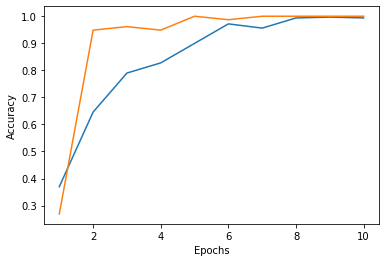

In [11]:
%matplotlib inline
plt.plot(range(1, epoch+1), history.history['acc'], label="training")
plt.plot(range(1, epoch+1), history.history['val_acc'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

Copyright © 2020 Hibiki SAIGYO All RIghts Reserved.